# Esercitazione di Laboratorio n. 1

- *Parte III: Generatore di passeggiate casuali* ***(versione rivisitata)***

I componenti di una comitiva di ubriachi, partendo ognuno da uno stesso punto di un giardino pubblico, devono raggiungere un muro. Ognuno ha la possibilità di muoversi in ***quattro*** direzioni: diritto, destra, sinistra, ***indietro***. Per semplicità si supponga che i percorsi siano vincolati ad una griglia $100 \times 100$ e le coordinate $(x,y)$ siano valori discreti. Si supponga inoltre che la posizione di partenza sia di coordinate $(0,\ 50)$. Progettare ed implementare un algoritmo che calcola il numero medio di passi per arrivare al muro, la percentuale di coloro che compiono la minore e la maggiore distanza.

**La storia di ogni ubriaco si deve considerare finita al raggiungimento di *uno qualsiasi* dei quattro muri, ma l'unico traguardo resta il muro frontale. Segue che i dati relativi ai passi degli ubriachi che raggiungono gli altri tre muri vanno scartati, e la costante di normalizzazione finale è rappresentata dal numero di ubriachi che raggiungono il traguardo**.

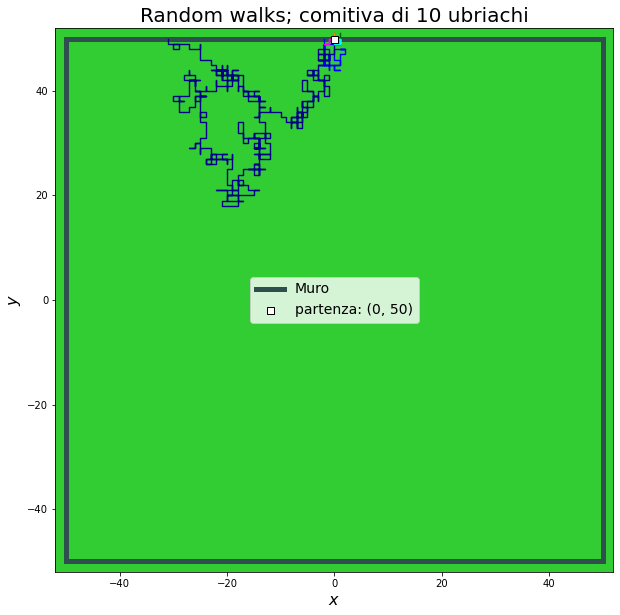

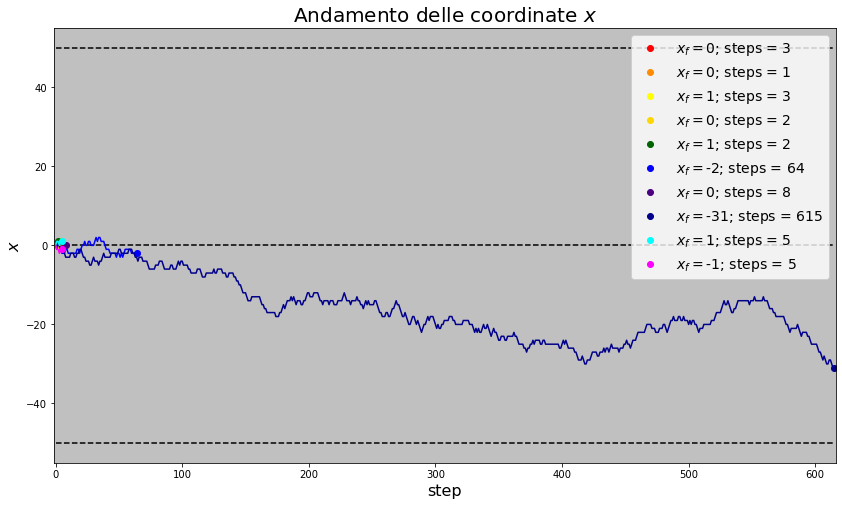

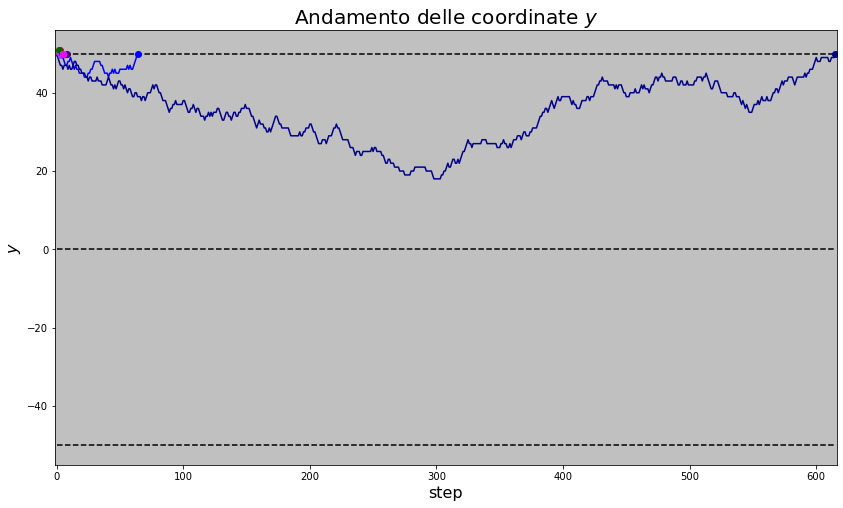

In [1]:
#CELLA 1

import matplotlib.pyplot as plt
import numpy as np
import random as ran
from time import time

colors=['red','darkorange','yellow','gold','darkgreen','blue','indigo','darkblue','cyan','fuchsia']
N=len(colors)
XX=[]
YY=[]
SS=[]
x0,y0=0,50

for n in range(N):
    r=[x0,y0]
    X,Y=[r[0]],[r[1]]
    steps=0

    while abs(r[0])<50 and r[1]>-50:
        ξ=ran.random()
    
        if 0<=ξ<1/4:        #a sinistra
            steps+=1
            r[0]-=1
            X.append(r[0])
            Y.append(r[1])
        elif 1/4<=ξ<1/2:    #a destra
            steps+=1
            r[0]+=1
            X.append(r[0])
            Y.append(r[1])
        elif 1/2<=ξ<3/4:    #avanti
            steps+=1
            r[1]-=1
            X.append(r[0])
            Y.append(r[1])
        else:               #indietro
            steps+=1
            r[1]+=1
            X.append(r[0])
            Y.append(r[1])
            if r[1]>=50:
                break

    XX.append(X)
    YY.append(Y)
    SS.append(steps)


#CELLA 2 ________________________________________________


plt.figure(figsize=(10,10))
ax=plt.axes()
ax.set_facecolor('limegreen')
plt.plot([-50,-50],[-50,50],'darkslategrey',lw=5,label='Muro')
plt.plot([-50,50],[-50,-50],'darkslategrey',lw=5)
plt.plot([50,50],[-50,50],'darkslategrey',lw=5)
plt.plot([-50,50],[50,50],'darkslategrey',lw=5)

for n in range(N):
    plt.plot(XX[n],YY[n],lw=1.4,c=colors[n])
plt.plot([0],[50],'s w',ms=7,mec='k',label='partenza: (0, 50)')

if N==1:
    plt.title('Random walk; 1 ubriaco',size=20)
    if r[1]==-50:
        plt.plot([r[0]],[-50],'s k',ms=7,mec='w',label='$x_f=$'+str(r[0])+'; steps = '+str(SS[0]))
else:
    plt.title('Random walks; comitiva di '+str(N)+' ubriachi',size=20)
    for n in range(N):
        if YY[n][-1]==-50:
            plt.plot([XX[n][-1]], [-50],'o',c=colors[n],ms=7,label='$x_f=$'+str(XX[n][-1])+'; steps = '+str(SS[n]))

plt.xlim([-52,52])
plt.ylim([-52,52])
plt.xlabel('$x$',size=16)
plt.ylabel('$y$',size=16)
plt.legend(fontsize=14)
plt.show()


if N==1:
    plt.figure(figsize=(14,8))
    ax=plt.axes()
    ax.set_facecolor('silver')
    plt.title('Andamento delle coordinate',size=20)
    plt.plot([0,steps],[-50,-50],'--k')
    plt.plot([0,steps],[0,0],'--k')
    plt.plot([0,steps],[50,50],'--k')
    plt.plot(X,'r',label='x(step)')
    plt.plot(Y,'b',label='y(step)')
    plt.plot([0,steps],[0,r[0]],'o r',label='$x_i=0,\; x_f=$'+str(r[0]))
    plt.plot([0,steps],[50,r[1]],'o b',label='$y_i=50,\; y_f=$'+str(r[1]))
    plt.xlim([-1,steps+1])
    plt.xlabel('step',size=16)
    plt.ylabel('$x,\; y$',size=16)
    plt.legend(fontsize=14)
    plt.show()

else:
    plt.figure(figsize=(14,8))
    ax=plt.axes()
    ax.set_facecolor('silver')
    plt.title('Andamento delle coordinate $x$',size=20)
    plt.plot([0,max(SS)],[-50,-50],'--k')
    plt.plot([0,max(SS)],[0,0],'--k')
    plt.plot([0,max(SS)],[50,50],'--k')
    
    for n in range(N):
        plt.plot(XX[n],c=colors[n])
        plt.plot([SS[n]],[XX[n][-1]],'o ',c=colors[n],label='$x_f=$'+str(XX[n][-1])+'; steps = '+str(SS[n]))
    
    plt.xlim([-1,max(SS)+1])
    plt.xlabel('step',size=16)
    plt.ylabel('$x$',size=16)
    plt.legend(fontsize=14)
    plt.show()

    plt.figure(figsize=(14,8))
    ax=plt.axes()
    ax.set_facecolor('silver')
    plt.title('Andamento delle coordinate $y$',size=20)
    plt.plot([0,max(SS)],[-50,-50],'--k')
    plt.plot([0,max(SS)],[0,0],'--k')
    plt.plot([0,max(SS)],[50,50],'--k')
    
    for n in range(N):
        plt.plot(YY[n],c=colors[n])
        plt.plot([SS[n]],[YY[n][-1]],'o ',c=colors[n])
    
    plt.xlim([-1,max(SS)+1])
    plt.xlabel('step',size=16)
    plt.ylabel('$y$',size=16)
    plt.show()

In [2]:
Nwalks=2*10**7
Ngoals=0
X_steps=[]
X_fin=[]
steps_min,steps_max = 10**9,0
Sum,Sum2=0,0
SumX,SumX2=0,0

T=time()
for n in range(Nwalks):
    r=[x0,y0]
    steps=0

    while abs(r[0])<50 and r[1]>-50:
        ξ=ran.random()
    
        if 0<=ξ<1/4:        #a sinistra
            steps+=1
            r[0]-=1

        elif 1/4<=ξ<1/2:    #a destra
            steps+=1
            r[0]+=1

        elif 1/2<=ξ<3/4:    #avanti
            steps+=1
            r[1]-=1

        else:               #indietro
            steps+=1
            r[1]+=1
            if r[1]>=50:
                break

    if r[1]==-50:
        Ngoals+=1
        X_steps.append(steps)
        X_fin.append(r[0])
        Sum+=steps
        Sum2+=steps**2
        SumX+=r[0]
        SumX2+=r[0]**2
        
        if steps<steps_min:
            steps_min=steps
        if steps>steps_max:
            steps_max=steps

if Ngoals==1:
    mi_steps=Sum
    mi_X=SumX
    Nsteps_min,Nsteps_max=1,1
    p_min,pmax=100,100

elif Ngoals>1:
    mi_steps=Sum/Ngoals
    s2_steps= (Sum2 - Sum**2/Nwalks)/(Ngoals-1)
    s_steps=np.sqrt(s2_steps)

    mi_X=SumX/Ngoals
    s2_X=(SumX2 - SumX**2/Ngoals)/(Ngoals-1)
    s_X=np.sqrt(s2_X)

    Nsteps_min=X_steps.count(steps_min)
    Nsteps_max=X_steps.count(steps_max)

    p_min=100*Nsteps_min/Ngoals
    p_max=100*Nsteps_max/Ngoals

T1=time()-T

print('Ngoals =',Ngoals)

Ngoals = 34125


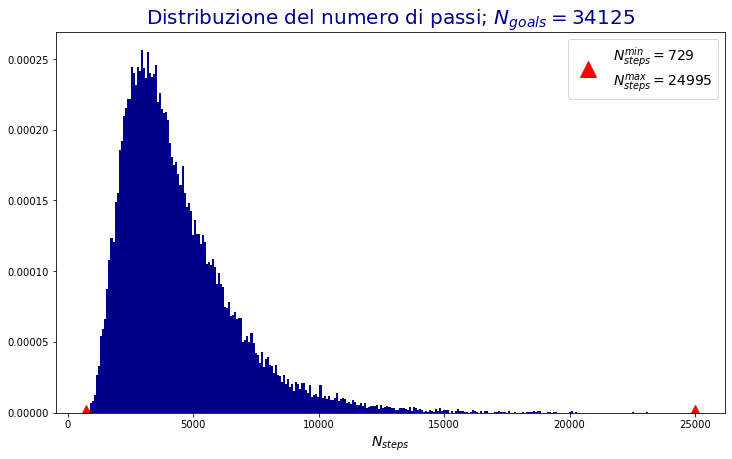

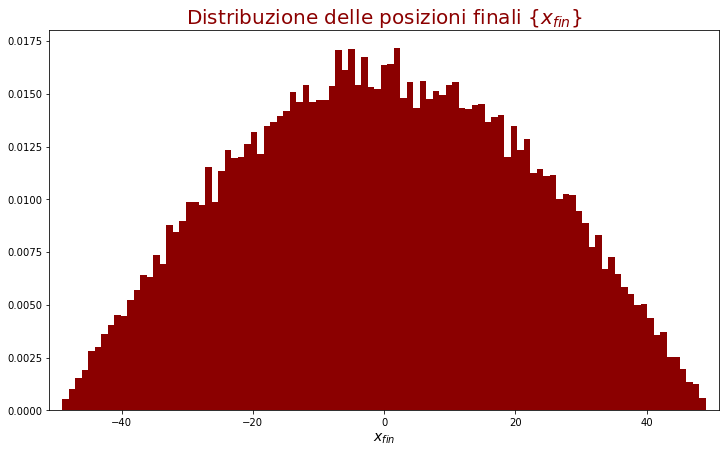

Compagnia di 20000000 ubriachi
Hanno raggiunto l'obbiettivo 34125 ubriachi.
Tempo di esecuzione:        t = 1396.039 s

Numero medio di passi:     mi = 4374.147
Varianza:                  s2 = 24136638.742
Deviazione standard:        s = 4912.905 

Posizione finale media:    mi = -0.1588
Varianza:                  s2 = 470.614
Deviazione standard:        s = 21.694 

N.  minimo di passi compiuti: 729 , da 1 ubriachi ( 0.00293 %)
N. massimo di passi compiuti: 24995 , da 1 ubriachi ( 0.00293 %)


In [3]:
T=time()
if Ngoals>=1:
    plt.figure(figsize=(12,7))
    plt.hist(X_steps,bins=300,density=True,log=False,color='darkblue')
    plt.plot([steps_min,steps_max],[0,0],'^ r',ms=16,
             label='$N_{steps}^{min}=$'+str(steps_min)+'\n$N_{steps}^{max}=$'+str(steps_max))
    plt.title('Distribuzione del numero di passi; $N_{goals}=$'+str(Ngoals),color='darkblue',size=20)
    plt.xlabel('$N_{steps}$',size=14)
    plt.legend(fontsize=14)
    plt.show()

    plt.figure(figsize=(12,7))
    plt.hist(X_fin,bins=101,range=(-50,50),density=True,log=False,color='darkred')
    plt.title('Distribuzione delle posizioni finali $\{x_{fin} \}$',color='darkred',size=20)
    plt.xlabel('$x_{fin}$',size=14)
    plt.xlim((-51,51))
    plt.show()
T2=time()-T
ΔT=T2+T1

print('Compagnia di',Nwalks,'ubriachi')
print("Hanno raggiunto l'obbiettivo",Ngoals,'ubriachi.')
print('Tempo di esecuzione:        t =',round(ΔT,3),'s\n')
if Ngoals==1:
    print('Numero medio di passi:     mi =',round(mi_steps,3))
    print('Posizione finale media:    mi =',round(mi_X,4))
    print('N.  minimo di passi compiuti:',steps_min,', da',Nsteps_min,'ubriachi (',round(p_min,6),'%)')
    print('N. massimo di passi compiuti:',steps_max,', da',Nsteps_max,'ubriachi (',round(p_max,6),'%)')
if Ngoals>1:
    print('Numero medio di passi:     mi =',round(mi_steps,3))
    print('Varianza:                  s2 =',round(s2_steps,3))
    print('Deviazione standard:        s =',round(s_steps,3),'\n')
    print('Posizione finale media:    mi =',round(mi_X,4))
    print('Varianza:                  s2 =',round(s2_X,3))
    print('Deviazione standard:        s =',round(s_X,3),'\n')
    print('N.  minimo di passi compiuti:',steps_min,', da',Nsteps_min,'ubriachi (',round(p_min,6),'%)')
    print('N. massimo di passi compiuti:',steps_max,', da',Nsteps_max,'ubriachi (',round(p_max,6),'%)')